In [1]:
import tensorflow as tf
from models import decoder, encoder, vae
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from hyperparameters import *
import pathlib

from utils import data_loading, experiments

In [2]:
apes_info = pd.read_csv(APES_INFO_FILEPATH)
all_images_ids, train_ids, validation_ids, test_ids = data_loading.get_image_ids(apes_info, pathlib.Path(DATA_FILEPATH))

In [3]:
dataset = data_loading.load_full_dataset(DATA_FILEPATH, IMAGE_SIZE, all_images_ids)

train_dataset = data_loading.load_specific_dataset(dataset, train_ids, BATCH_SIZE)
test_dataset = data_loading.load_specific_dataset(dataset, test_ids, BATCH_SIZE)

Found 10000 files belonging to 10000 classes.


In [4]:
encoder_model = encoder.build_encoder(**ENCODER_MODEL_HYPERPARAMETERS)
decoder_model = decoder.build_decoder(**DECODER_MODEL_HYPERPARAMETERS)

vae_model = vae.VAE(encoder_model, decoder_model, RECONSTRUCTION_LOSS_WEIGHT, KL_LOSS_WEIGHT)
vae_model.load_weights(MODEL_VAE_FILEPATH)

In [5]:
(
    sample_bored_mouth,
    sample_grin_mouth,
    shifted_images_bored_mouth,
    shifted_images_grin_mouth,
) = experiments.perform_image_shifting(
    encoder_model, decoder_model, dataset, apes_info, "Mouth", "Bored", "Grin", 5, BATCH_SIZE
)

2023-06-03 10:23:19.563124: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:23:19.563226: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


18/18 [==============================] - 16s 866ms/step


2023-06-03 10:23:35.551009: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:23:35.551109: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


6/6 [==============================] - 14s 2s/step


2023-06-03 10:23:49.778506: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:23:49.778618: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:23:50.677719: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10

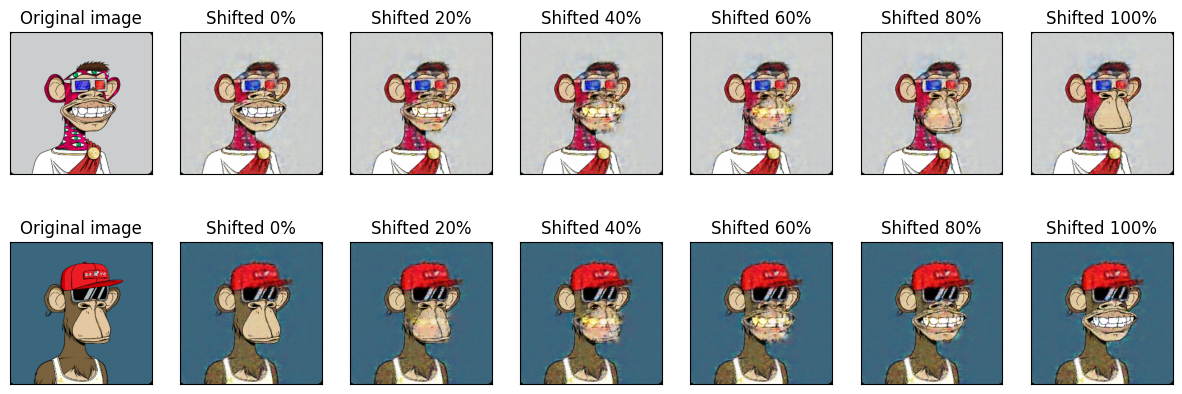

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 7, 1)
plt.imshow(sample_grin_mouth)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 7, 8)
plt.imshow(sample_bored_mouth)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

for i in range(6):
    plt.subplot(2, 7, i + 2)
    plt.imshow(shifted_images_grin_mouth[i])
    plt.title(f"Shifted {i/5 * 100:.0f}%")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 7, i + 9)
    plt.imshow(shifted_images_bored_mouth[i])
    plt.title(f"Shifted {i/5 * 100:.0f}%")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [20]:
(
    sample_brown_fur,
    sample_cream_fur,
    shifted_images_brown_fur,
    shifted_images_cream_fur,
) = experiments.perform_image_shifting(
    encoder_model, decoder_model, dataset, apes_info, "Fur", "Brown", "Cream", 5, BATCH_SIZE
)

2023-06-03 10:28:05.473826: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:28:05.473931: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


11/11 [==============================] - 15s 1s/step


2023-06-03 10:28:20.421139: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:28:20.421242: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


5/5 [==============================] - 15s 3s/step


2023-06-03 10:28:35.204278: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-06-03 10:28:35.204403: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 10:28:36.781696: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10

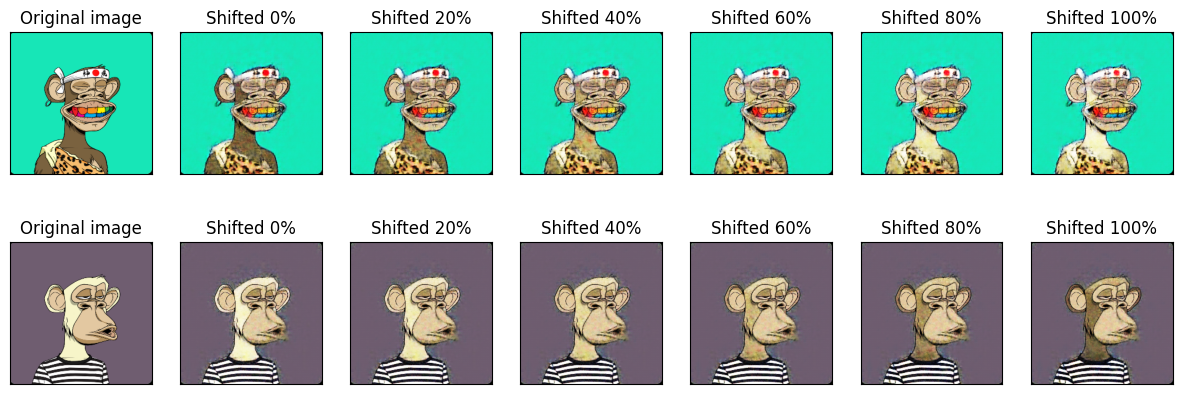

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 7, 1)
plt.imshow(sample_brown_fur)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

plt.subplot(2, 7, 8)
plt.imshow(sample_cream_fur)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

for i in range(6):
    plt.subplot(2, 7, i + 2)
    plt.imshow(shifted_images_brown_fur[i])
    plt.title(f"Shifted {i/5 * 100:.0f}%")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 7, i + 9)
    plt.imshow(shifted_images_cream_fur[i])
    plt.title(f"Shifted {i/5 * 100:.0f}%")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [25]:
s = dataset.take(2)
s1 = list(s)

t1 = s1[0][0].numpy()
t2 = s1[1][0].numpy()

In [38]:
enc1 = encoder_model(t1.reshape(1, 256, 256, 3))
enc2 = encoder_model(t2.reshape(1, 256, 256, 3))

dec1 = decoder_model(enc1[2])
dec2 = decoder_model(enc2[2])

mlt = enc1[2] * 0.5 + enc2[2] * 0.5
dec_mlt = decoder_model(mlt)

In [40]:
ot = []
for i in range(11):
    mlt = enc1[2] * (i / 10) + enc2[2] * ((10 - i) / 10)
    dec_mlt = decoder_model(mlt)
    ot.append(dec_mlt)

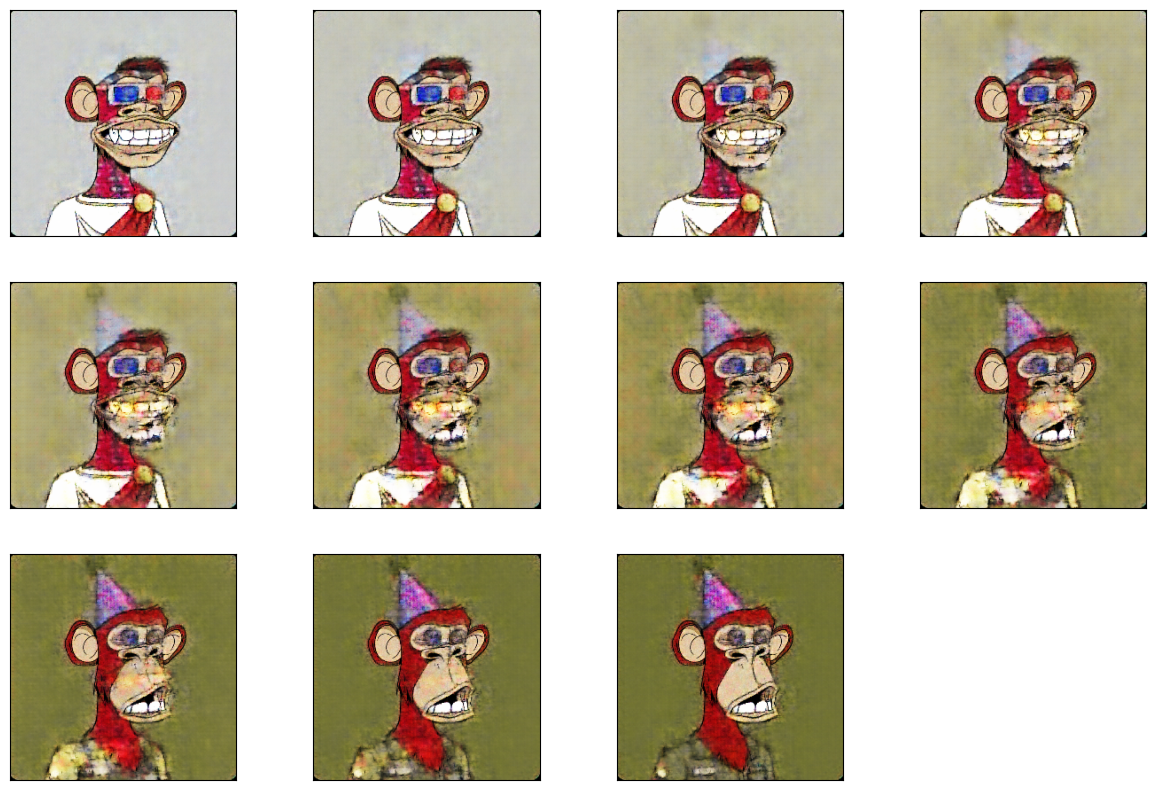

In [48]:
plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i + 1)
    plt.imshow(ot[i][0])
    plt.xticks([])
    plt.yticks([])
plt.show()

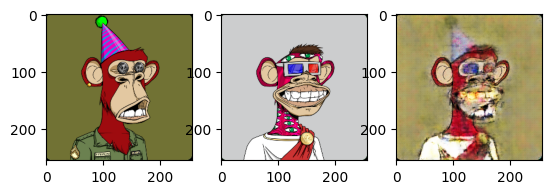

In [39]:
plt.subplot(131)
plt.imshow(t1)
plt.subplot(132)
plt.imshow(t2)
plt.subplot(133)
plt.imshow(dec_mlt[0])